In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [144]:
dq = pd.read_csv('Data_for_UCI_named.csv')

In [145]:
dq.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [146]:
dq.drop(columns = ['stab'], inplace = True)
dq.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [147]:
dq.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stabf    0
dtype: int64

In [148]:
dq

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,unstable


In [149]:
X = dq.drop(columns =['stabf'])
y = dq['stabf']

print(X.head())
print (y.head())

       tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2  8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3  0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4  3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   

         p4        g1        g2        g3        g4  
0 -1.723086  0.650456  0.859578  0.887445  0.958034  
1 -1.255012  0.413441  0.862414  0.562139  0.781760  
2 -0.920492  0.163041  0.766689  0.839444  0.109853  
3 -0.997374  0.446209  0.976744  0.929381  0.362718  
4 -0.554305  0.797110  0.455450  0.656947  0.820923  
0    unstable
1      stable
2    unstable
3    unstable
4    unstable
Name: stabf, dtype: object


In [150]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

In [151]:
x_train.reset_index( drop = True, inplace = True)
y_train.reset_index( drop = True, inplace = True)
x_test.reset_index( drop = True, inplace = True)
y_test.reset_index( drop = True, inplace = True)

In [152]:
x_test

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,6.877876,4.113820,9.356768,8.299753,4.056779,-1.897470,-1.590581,-0.568728,0.276567,0.845536,0.112440,0.822562
1,5.802841,6.271371,4.731540,3.819867,3.579569,-1.709480,-1.067511,-0.802579,0.077527,0.416478,0.912846,0.861306
2,2.286998,4.385142,2.830232,5.293880,3.035814,-1.202764,-0.902011,-0.931039,0.924216,0.130186,0.703887,0.063811
3,5.019920,2.209962,6.266080,0.578901,4.322584,-1.960207,-1.074561,-1.287815,0.546910,0.065992,0.427349,0.814648
4,7.646145,9.187896,5.484219,9.934313,3.634226,-1.254541,-1.335366,-1.044319,0.561528,0.121611,0.787318,0.300314
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,8.320531,3.394352,1.468729,8.766874,3.940123,-1.599081,-0.931023,-1.410020,0.657445,0.493384,0.178907,0.173240
1996,2.290102,3.028512,8.071234,6.169944,3.624592,-1.104003,-0.820951,-1.699638,0.785595,0.770194,0.234290,0.225070
1997,7.848945,0.684889,0.728223,6.702948,2.599685,-0.563497,-1.210069,-0.826119,0.185122,0.559799,0.682418,0.886902
1998,2.173967,5.776797,4.597638,6.399330,2.869349,-0.931891,-1.237955,-0.699503,0.942680,0.743103,0.152161,0.305183


In [153]:
scaler =  StandardScaler()
encode = LabelEncoder()

In [154]:
sc_xtrain = pd.DataFrame( scaler.fit_transform (x_train), columns = x_train.columns)

sc_xtest = pd.DataFrame(scaler.transform (x_test) , columns = x_test.columns)

#sc_ytrain = scaler.fit_transform(y_train)

In [155]:
sc_xtrain

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.367327,-0.986042,0.650447,1.547527,-0.291490,0.061535,1.293862,-0.845074,0.160918,0.339859,0.585568,0.492239
1,-0.064659,0.089437,1.035079,-1.641494,0.619865,-0.067235,-1.502925,0.486613,-0.293143,-1.558488,1.429649,-1.443521
2,-1.467850,1.298418,-0.502536,1.166046,-0.180521,0.490603,0.682560,-0.855302,1.399350,1.451534,-1.045743,0.492489
3,0.820081,0.529920,1.299657,-1.141975,-0.812854,-0.763632,1.521579,0.658780,-0.958319,1.361958,1.604140,0.275303
4,0.665424,-1.425627,0.312300,0.919137,-1.614296,0.760315,1.422019,0.639243,1.676895,0.695660,1.137504,-1.312575
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1.551314,0.007408,-1.177640,1.016898,-0.397177,0.759820,-0.636951,0.572703,-1.209413,0.313976,-1.625728,-0.637401
7996,1.015925,-0.223483,-1.489381,-1.479078,0.451468,-0.731994,0.990355,-1.048148,-1.094647,-0.755209,0.734821,-0.304433
7997,0.657609,-0.722756,-1.405888,-0.274301,-0.012584,1.438694,-0.364266,-1.046683,1.253539,0.293100,-1.550587,0.810344
7998,-0.059316,-1.260532,-1.010471,-0.877808,-0.779769,0.828824,0.516923,0.018984,-0.182448,-0.388255,-0.726781,1.667916


In [156]:
rand_f = RandomForestClassifier(random_state = 1)
ex_rand = ExtraTreesClassifier(random_state = 1)


In [157]:
# fitting the classiders 

In [158]:
rand_f.fit (sc_xtrain,  y_train)
ex_rand.fit (sc_xtrain, y_train)

ExtraTreesClassifier(random_state=1)

In [159]:
ypred_ranf = rand_f.predict(sc_xtest)
ypred_exran = ex_rand.predict(sc_xtest)

In [160]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix, classification_report

In [161]:
accuracy_score(y_test, ypred_ranf)

0.929

In [162]:
precision_score(y_test, ypred_ranf, pos_label = 'unstable' )

0.9340909090909091

In [163]:
recall_score(y_test, ypred_ranf, pos_label = 'unstable' )

0.9572981366459627

In [164]:
print(classification_report(y_test, ypred_ranf, digits = 4 ))

              precision    recall  f1-score   support

      stable     0.9191    0.8778    0.8980       712
    unstable     0.9341    0.9573    0.9456      1288

    accuracy                         0.9290      2000
   macro avg     0.9266    0.9176    0.9218      2000
weighted avg     0.9288    0.9290    0.9286      2000



In [165]:
accuracy_score(y_test, ypred_exran)

0.928

In [166]:
print (classification_report (y_test, ypred_exran, digits = 4))

              precision    recall  f1-score   support

      stable     0.9410    0.8511    0.8938       712
    unstable     0.9218    0.9705    0.9455      1288

    accuracy                         0.9280      2000
   macro avg     0.9314    0.9108    0.9197      2000
weighted avg     0.9287    0.9280    0.9271      2000



In [167]:
import lightgbm as lb
import xgboost as xg



In [168]:
lg_c = lb.LGBMClassifier(random_state = 1)

lg_c.fit (sc_xtrain, y_train)

LGBMClassifier(random_state=1)

In [169]:
ypred_lgc = lg_c.predict (sc_xtest)

In [170]:
print(classification_report(y_test, ypred_lgc, digits = 4))

              precision    recall  f1-score   support

      stable     0.9297    0.8919    0.9104       712
    unstable     0.9415    0.9627    0.9520      1288

    accuracy                         0.9375      2000
   macro avg     0.9356    0.9273    0.9312      2000
weighted avg     0.9373    0.9375    0.9372      2000



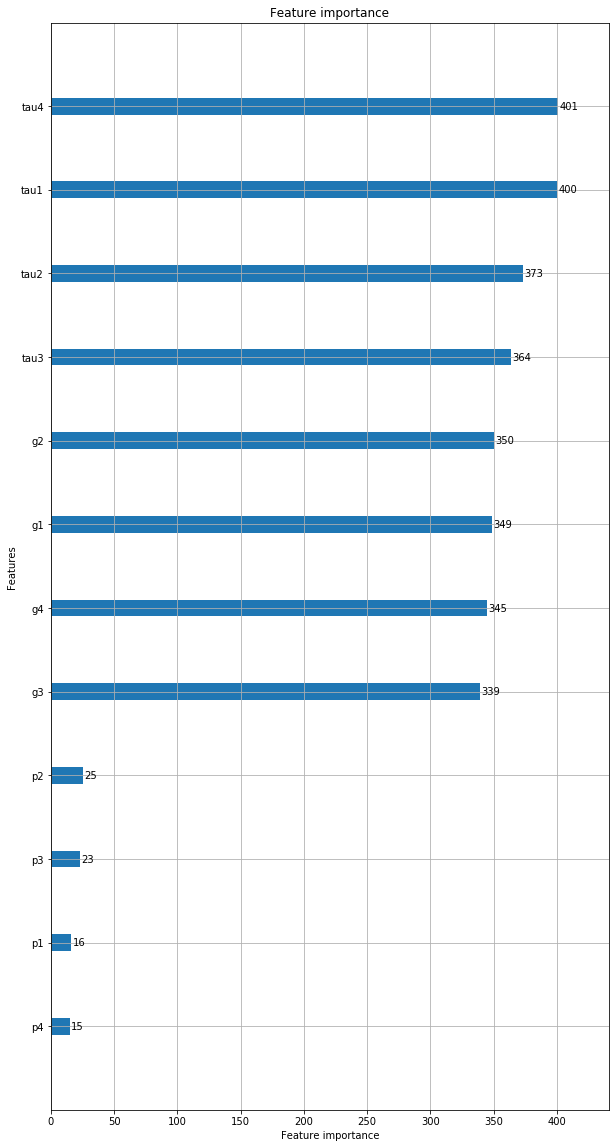

In [171]:
lb.plot_importance(lg_c)
plt.rcParams['figure.figsize'] = [10, 20]
plt.show()

In [172]:
xg_c = xg.XGBClassifier(random_state = 1)

xg_c.fit (sc_xtrain, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [173]:
ypred_xgc = xg_c.predict (sc_xtest)

In [174]:
accuracy_score(y_test, ypred_xgc)

0.9455

In [175]:
print (classification_report(y_test, ypred_xgc, digits = 4))

              precision    recall  f1-score   support

      stable     0.9351    0.9101    0.9224       712
    unstable     0.9510    0.9651    0.9580      1288

    accuracy                         0.9455      2000
   macro avg     0.9430    0.9376    0.9402      2000
weighted avg     0.9453    0.9455    0.9453      2000



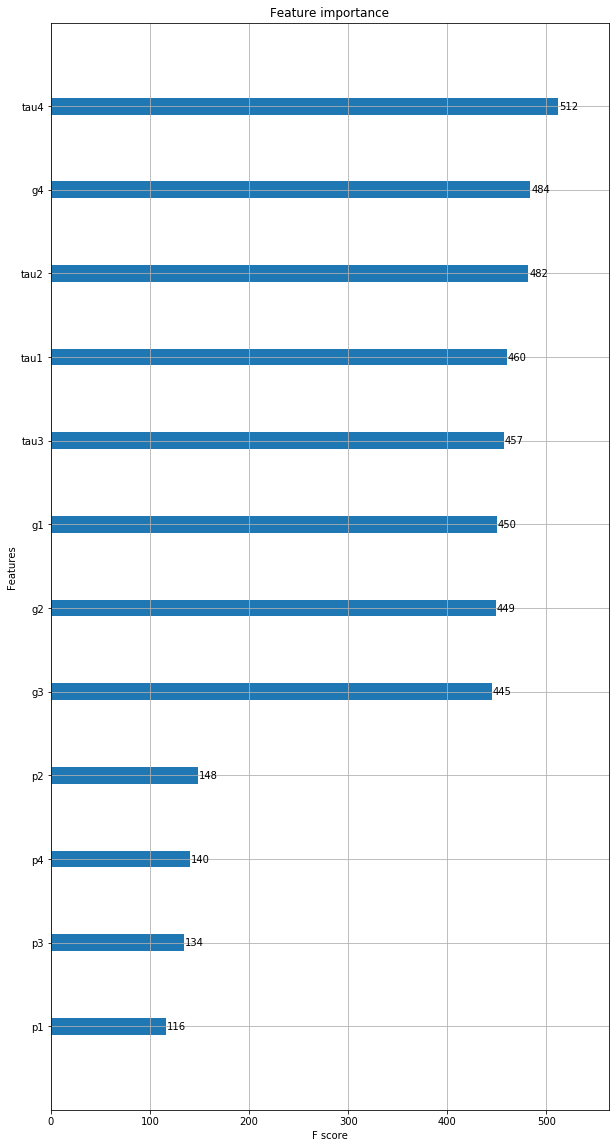

In [176]:
xg.plot_importance(xg_c)
plt.rcParams['figure.figsize'] = [10,20 ]
plt.show()

In [177]:
from sklearn.model_selection import RandomizedSearchCV

In [178]:
n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None] 

hyperparameter_grid = {'n_estimators': n_estimators,

                       'min_samples_leaf': min_samples_leaf,

                       'min_samples_split': min_samples_split,

                       'max_features': max_features}

In [179]:
exrand_srh = RandomizedSearchCV (ex_rand, hyperparameter_grid,cv = 5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1, random_state =1 )

In [180]:
exrand_srh.fit (sc_xtrain, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.5min finished


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 3, 5, 7, 9],
                                        'n_estimators': [50, 100, 300, 500,
                                                         1000]},
                   random_state=1, scoring='accuracy', verbose=1)

In [181]:
exrand_srh.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': None}

In [182]:
opt_exrand = ExtraTreesClassifier( n_estimators = 1000,
 min_samples_split = 2,
 min_samples_leaf = 8,
 max_features = None, random_state = 1)

In [183]:
opt_exrand.fit(sc_xtrain, y_train)

ExtraTreesClassifier(max_features=None, min_samples_leaf=8, n_estimators=1000,
                     random_state=1)

In [184]:
ypred_optexrand = opt_exrand.predict(sc_xtest)

In [185]:
accuracy_score(y_test, ypred_optexrand)

0.927

In [186]:
ext_imoportance = opt_exrand.feature_importances_

In [187]:
#pd.DataFrame(opt_exrand.feature_importances_, columns = sc_xtrain.columns)

In [188]:
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        opt_exrand.estimators_], 
                                        axis = 0) 



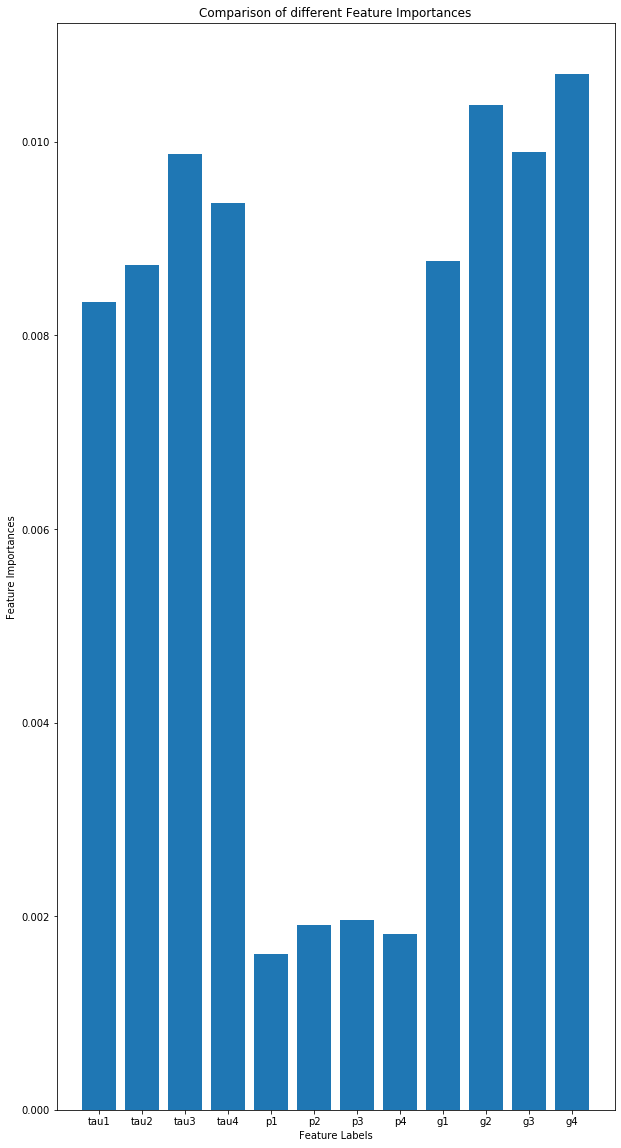

In [189]:
plt.bar(x_train.columns, feature_importance_normalized) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show() 